In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import os
%matplotlib inline
sns.set_style('white')

In [5]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')

In [6]:
df = pd.read_csv('Autism_Data.csv', encoding='latin1')

---

Exploring and Cleaning the Dataset

In [7]:
#Converting yes/no to 1/0 respectively
conversion = {'yes': 1, 'no': 0, 'YES': 1, 'NO': 0}
df['jundice'] = df['jundice'].map(conversion)
df['austim'] = df['austim'].map(conversion)
df['used_app_before'] = df['used_app_before'].map(conversion)
df['Class/ASD'] = df['Class/ASD'].map(conversion)

In [8]:
#Converting f/m to 1/0 respectively
trans = {'f': 0, 'm': 1}
df['gender'] = df['gender'].map(trans)

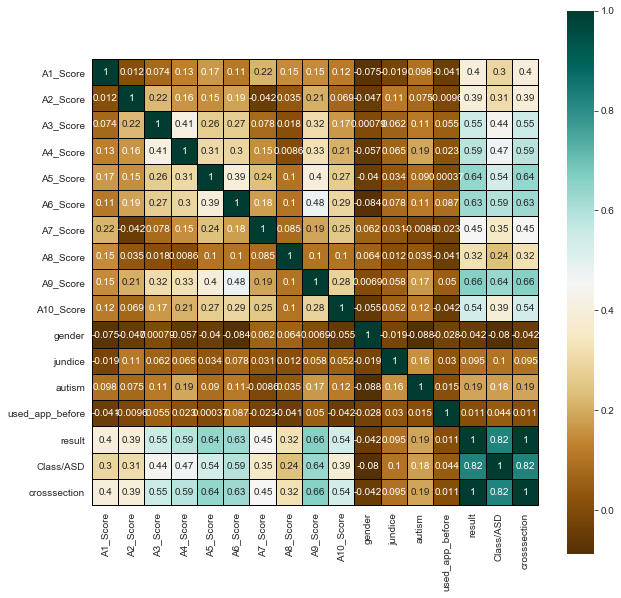

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

In [23]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0,6,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0,5,0
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,0,8,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0,6,0
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,0,2,0


In [24]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim', 'used_app_before', 'result', 'Class/ASD'],
      dtype='object')


In [25]:
df.drop('ethnicity', axis=1, inplace=True)
#make a list if you want to drop more columns

KeyError: "['ethnicity'] not found in axis"

In [26]:
del df['contry_of_res']

KeyError: 'contry_of_res'

In [27]:
del df['age_desc']

KeyError: 'age_desc'

In [28]:
del df['relation']

KeyError: 'relation'

In [67]:
df = df.rename(index=int, columns={"austim": "autism"})
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,autism,used_app_before,result,Class/ASD,crosssection
0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,6,0,0.6
1,1,1,0,1,0,0,0,1,0,1,1,0,1,0,5,0,0.5
2,1,1,0,1,1,0,1,1,1,1,1,1,1,0,8,1,0.8
3,1,1,0,1,0,0,1,1,0,1,0,0,1,0,6,0,0.6
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0.2


In [62]:
del df['age']
#Quantify Object Variable
#Hot Encoding?
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


KeyError: 'age'

In [63]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice',
       'austim', 'used_app_before', 'result', 'Class/ASD', 'crosssection'],
      dtype='object')


In [32]:
#Cross section, finding the mean of the features
df['crosssection'] = np.mean(df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']], axis=1)

In [37]:
df.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
gender               int64
jundice              int64
austim               int64
used_app_before      int64
result               int64
Class/ASD            int64
crosssection       float64
dtype: object

---

Creating Training and Test Sets

In [79]:
# Create our training and testing data
trainsize = int(df.shape[0] / 2)
df_train = df.iloc[:trainsize, :].copy()
df_test = df.iloc[trainsize:, :].copy()

# Create our Xs and Ys
Y_train = df_train['autism'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['crosssection'])]

Y_test = df_test['autism'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_train.columns).isin(['crosssection'])]

In [69]:
# Scale everything down
#names = df.columns
#df = pd.DataFrame(preprocessing.scale(df), columns=names)# Ridge regression
#ridg = linear_model.Ridge(alpha=10, fit_intercept=False)
#ridgfit = ridg.fit(X_train, Y_train)

# See the results for the training set
#print('R-squared for ridge:', ridg.score(X_train, Y_train))
#print('\nParameter estimates for ridge:')
#print(np.append(ridgfit.coef_, ridgfit.intercept_))

# See the results for the test set
#print('R-squared for ridge (test):', ridg.score(X_test, Y_test))

In [91]:
linear = linear_model.LinearRegression()
linearfit = linear.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for linear regression:', linear.score(X_train, Y_train))
print('\nParameter estimates for linear regression:')
print(np.append(linearfit.coef_, linearfit.intercept_))

# See the results for the test set
print('R-squared for linear regression (test):', linear.score(X_test, Y_test))
cross_val_score(linear, X_train, Y_train, cv=5)

R-squared for linear regression: 1.0

Parameter estimates for linear regression:
[-7.89255885e-17  1.65440685e-16  1.82203257e-16 -8.34015489e-16
 -4.00686019e-16  5.87464569e-16  4.16141114e-16 -3.35195493e-16
  1.12055984e-16 -3.51532987e-17  1.54751513e-16 -2.42869171e-16
  1.00000000e+00  4.43354613e-16  2.19688142e-17  3.58668757e-16
  5.55111512e-17]
R-squared for linear regression (test): 1.0


array([1., 1., 1., 1., 1.])

In [92]:
#Logistics Regression
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df['autism']
X = df[['crosssection','Class/ASD','result']]
# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

#print('\n Percentage accuracy training set')
#print(lr.score(X_train, Y_train))

#print('\n Percentage accuracy testing set')
#print(lr.score(X_test, Y_test))


print('\n Accuracy by autism predictions')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

cross_val_score(lr, X, y, cv=10)

Coefficients
[[0.01988828 0.1476423  0.19888283]]
[-3.04240535]

 Accuracy by autism predictions
autism    0   1
row_0          
0       613  91

 Percentage accuracy
0.8707386363636364


C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.86111111, 0.87323944, 0.87323944, 0.87142857, 0.87142857,
       0.87142857, 0.87142857, 0.87142857, 0.87142857, 0.87142857])

In [76]:
# Ridge regression
ridg = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgfit = ridg.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for ridge:', ridg.score(X_train, Y_train))
print('\nParameter estimates for ridge:')
print(np.append(ridgfit.coef_, ridgfit.intercept_))

print('\n Percentage accuracy training set')
print(ridg.score(X_train, Y_train))

print('\n Percentage accuracy testing set')
print(ridg.score(X_test, Y_test))

# See the results for the test set
print('R-squared for ridge (test):', ridg.score(X_test, Y_test))
cross_val_score(ridgfit, X_train, Y_train, cv=10)

R-squared for ridge: 0.9640663487992177

Parameter estimates for ridge:
[ 7.53219730e-03 -1.36654352e-03 -3.08527840e-03  2.15350642e-02
 -1.07911713e-02 -8.27586538e-03 -1.49135404e-02  2.30976436e-03
  2.09858802e-03  9.31268654e-03 -7.97326982e-03  2.29928000e-02
  8.02470242e-01 -1.24616800e-02  4.35590147e-03  1.85433550e-04
  0.00000000e+00]

 Percentage accuracy training set
0.9640663487992177

 Percentage accuracy testing set
0.9636475337638112
R-squared for ridge (test): 0.9636475337638112


array([0.94231779, 0.95242466, 0.95030887, 0.95308725, 0.96299574,
       0.94348553, 0.95091398, 0.95199419, 0.93361373, 0.94051943])

In [77]:
# Lasso regression
lass = linear_model.Lasso(alpha=0.5)
lassfit = lass.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for lasso:', lass.score(X_train, Y_train))
print('\nParameter estimates for lasso:')
print(np.append(lassfit.coef_, lassfit.intercept_))

print('\n Percentage accuracy training set')
print(lass.score(X_train, Y_train))

print('\n Percentage accuracy testing set')
print(lass.score(X_test, Y_test))

# See the results for the test set
print('R-squared for lasso (test):', lass.score(X_test, Y_test))
cross_val_score(lass, X_train, Y_train, cv=10)

R-squared for lasso: 0.0

Parameter estimates for lasso:
[ 0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.          0.          0.          0.14488636]

 Percentage accuracy training set
0.0

 Percentage accuracy testing set
-0.00969551282051273
R-squared for lasso (test): -0.00969551282051273


array([-7.31186242e-02, -3.73182544e-04, -8.13410882e-02, -1.14062396e-02,
       -5.50890520e-02, -1.19823065e-01, -1.76193113e-01, -4.14639082e-05,
       -5.50890520e-02, -6.01028324e-01])

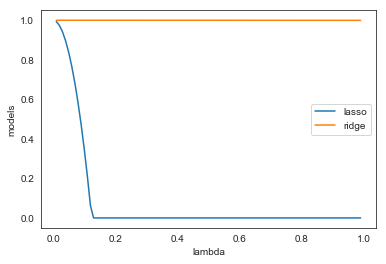

In [78]:
# Ridge plot

results = pd.DataFrame(columns=["lasso", "ridge", "lambda"])

for lambd in np.arange(0.01,1,0.01):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train, Y_train)
    lass_score = lass.score(X_train, Y_train)
    
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train, Y_train)
    ridgeregr_score = ridgeregr.score(X_train, Y_train)
    
    res = pd.DataFrame([[lass_score, ridgeregr_score, lambd]], columns=["lasso", "ridge", "lambda"])

    results = results.append(res)

plt.plot(results['lambda'], results['lasso'])
plt.plot(results['lambda'], results['ridge'])
plt.xlabel('lambda')
plt.ylabel('models')
plt.legend(["lasso", "ridge"])
plt.show()

---

Let's see what happens when we apply this to a decision tree and random forest